<a href="https://colab.research.google.com/github/jmmarinr/ComputationalMethods/blob/master/Raices/Actividad04_Raices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt

# Actividad 04: Raices y ecuaciones de una variable

---
### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales 2025-1
---

# 1

El método de **Regula Falsi** es una modificación al método de Bisección. Con base en los siguientes pasos, escriba una función que calcule la raiz de una función. Pruebe con $x^2 - 4 = 0$, y examine la convergencia en función de la tolerancia.


### Pasos

1. **Inicialización**:
   - Se parte de un intervalo $[a, b]$ donde $f(a)$ y $f(b)$ tienen signos opuestos.
   - Esto garantiza que hay al menos una raíz en el intervalo (por el teorema del valor intermedio).

2. **Cálculo del punto de intersección**:
   - En lugar de tomar el punto medio como en la bisección, se calcula un punto c usando la siguiente fórmula:
     
     $$c = \frac{a \cdot f(b) - b \cdot f(a)}{f(b) - f(a)}$$

   - Esta fórmula representa la intersección de la línea que conecta los puntos $(a, f(a))$ y $(b, f(b))$ con el eje $x$.

3. **Evaluación y actualización del intervalo**:
   - Se evalúa $f(c)$.
   - Si $f(c) = 0$ (o es menor que una tolerancia establecida), $c$ es la raíz buscada.
   - Si $f(c)$ tiene el mismo signo que $f(a)$, se actualiza $a = c$.
   - Si $f(c)$ tiene el mismo signo que $f(b)$, se actualiza $b = c$.

4. **Iteración**:
   - Se repiten los pasos 2 y 3 hasta que se cumpla un criterio de parada (por ejemplo, $|f(c)| < tolerancia$ o se alcance un número máximo de iteraciones).

In [2]:
import numpy as np

def regula_falsi(f, a, b, tol=1e-6, max_iter=100):
    if f(a) * f(b) >= 0:
        raise ValueError("La función debe tener signos opuestos en a y b.")

    iteraciones = 0
    c_ant = a  # valor anterior de c para evaluar cambio
    errores = []
    valores_c = []

    for _ in range(max_iter):
        fa, fb = f(a), f(b)
        c = (a * fb - b * fa) / (fb - fa)
        fc = f(c)

        valores_c.append(c)
        errores.append(abs(fc))

        iteraciones += 1
        if abs(fc) < tol:
            break

        if fa * fc < 0:
            b = c
        else:
            a = c

        c_ant = c

    return c, iteraciones, valores_c, errores

In [3]:
# Definir la función
f = lambda x: x**2 - 4

# Intervalo inicial [a, b] donde f(a)*f(b) < 0
a, b = 0, 3

# Evaluar con diferentes tolerancias
tolerancias = [1e-1, 1e-3, 1e-6, 1e-9]

for tol in tolerancias:
    raiz, iters, vals, errs = regula_falsi(f, a, b, tol=tol)
    print(f"\nTolerancia: {tol}")
    print(f"Raíz aproximada: {raiz:.10f}")
    print(f"Iteraciones: {iters}")
    print(f"Error final: {errs[-1]:.2e}")


Tolerancia: 0.1
Raíz aproximada: 1.9936102236
Iteraciones: 4
Error final: 2.55e-02

Tolerancia: 0.001
Raíz aproximada: 1.9999488007
Iteraciones: 7
Error final: 2.05e-04

Tolerancia: 1e-06
Raíz aproximada: 1.9999999181
Iteraciones: 11
Error final: 3.28e-07

Tolerancia: 1e-09
Raíz aproximada: 1.9999999999
Iteraciones: 15
Error final: 5.24e-10


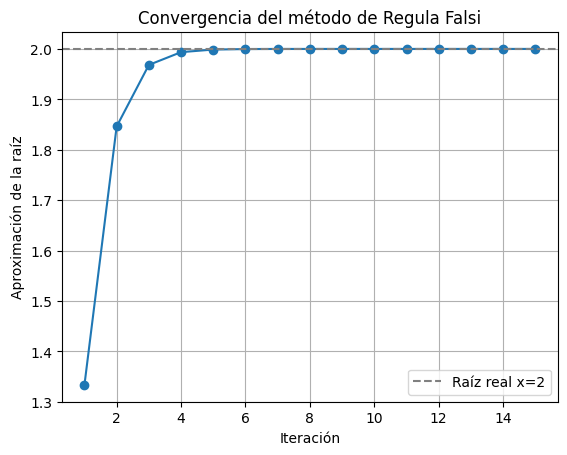

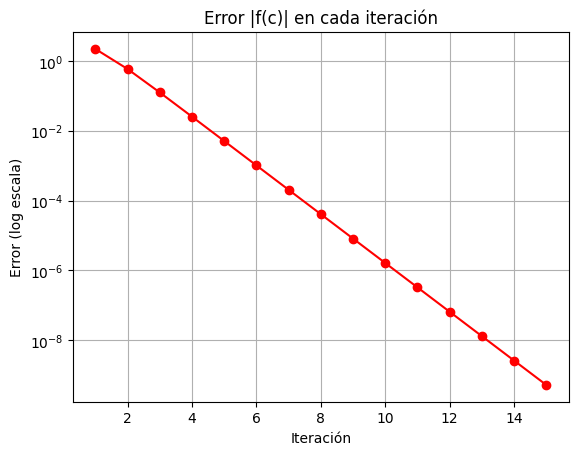

In [4]:
import matplotlib.pyplot as plt

raiz, iters, valores, errores = regula_falsi(f, 0, 3, tol=1e-9)

# Aproximaciones
plt.plot(range(1, iters + 1), valores, marker='o')
plt.axhline(2, color='gray', linestyle='--', label='Raíz real x=2')
plt.title('Convergencia del método de Regula Falsi')
plt.xlabel('Iteración')
plt.ylabel('Aproximación de la raíz')
plt.grid(True)
plt.legend()
plt.show()

# Error
plt.plot(range(1, iters + 1), errores, marker='o', color='red')
plt.yscale('log')
plt.title('Error |f(c)| en cada iteración')
plt.xlabel('Iteración')
plt.ylabel('Error (log escala)')
plt.grid(True)
plt.show()

# 2

Una carga total $Q$ se distribuye uniformemente alrededor de un conductor en forma de anillo de radio $a$. Una carga $q$ se encuentra a una distancia $x$ horizontalmente a través del centro del anillo. La fuerza ejercida sobre la carga por el anillo está dada por:

$$F = \frac{1}{4\piϵ_0}\frac{qQx}{(x^2+a^2)^{3/2}}$$

con $q$ y $Q$ de $2\times 10^{-5}$C.

  * Escriba una función donde ingresen los valores de $a$ y $x$ para hallar la fuerza.
  * Haga un gráfico de $F(x)$ para un anillo de radio $a= 0.85$m para $0.1\leq x\leq 2.0$m
  * Usando el método de Newton-Raphson y otro diferente, para encontrar el valor de $x$ en el cual la fuerza será equivalente a 1.25 N.
  * Encuentre qué sucede si disminuimos el radio con respecto a la fuerza que experimentará la carga $q$.

1. Escribir la función para calcular la fuerza

La fórmula para la fuerza que se ejerce sobre una carga q por el anillo cargado es:

$F(x) = \frac{1}{4 \pi \epsilon_0} \frac{qQx}{(x^2 + a^2)^{3/2}}$

Donde:

•	$q = 2 \times 10^{-5} \, \text{C}$

•	$Q = 2 \times 10^{-5} \, \text{C}$

•	$a$ es el radio del anillo.

•	$x$ es la distancia desde el centro del anillo donde se encuentra la carga $q$.

La constante $\epsilon_0$ (permitividad del vacío) es $8.854 \times 10^{-12} \, \text{C}^2/\text{N} \cdot \text{m}^2$.

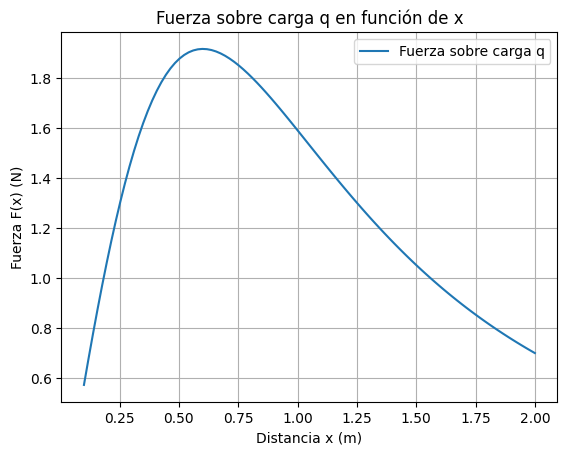

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
epsilon_0 = 8.854e-12  # permitividad del vacío en C^2/(N·m^2)
q = 2e-5  # carga q en C
Q = 2e-5  # carga Q en C

def fuerza(a, x):
    """
    Calcula la fuerza sobre la carga q por el anillo cargado de radio a.
    """
    return (1 / (4 * np.pi * epsilon_0)) * (q * Q * x) / (x**2 + a**2)**(3/2)

# Valores
a = 0.85  # radio del anillo en metros
x_values = np.linspace(0.1, 2.0, 100)  # valores de x entre 0.1 y 2.0 metros

# Calcular la fuerza para cada valor de x
f_values = fuerza(a, x_values)

# Graficar la fuerza F(x)
plt.plot(x_values, f_values, label='Fuerza sobre carga q')
plt.xlabel('Distancia x (m)')
plt.ylabel('Fuerza F(x) (N)')
plt.title('Fuerza sobre carga q en función de x')
plt.grid(True)
plt.legend()
plt.show()

3. Método de Newton-Raphson para encontrar $x$ cuando $F(x) = 1.25 \, \text{N}$

Vamos a usar el método de Newton-Raphson para encontrar la distancia $x$ cuando la fuerza es 1.25 N.

El método de Newton-Raphson es un método iterativo para encontrar raíces de una función. Dado que necesitamos que la fuerza sea igual a 1.25 N, podemos reestructurar el problema de la siguiente manera:

$f(x) = F(x) - 1.25 = 0$

Luego, aplicamos el método de Newton-Raphson para encontrar $x$.

La fórmula de Newton-Raphson es:

$_{n+1} = x_n - \frac{f(x_n)}{f’(x_n)}$

Donde $f’(x)$ es la derivada de $f(x)$ con respecto a $x$.

In [6]:
def f_newton(x, a, target=1.25):
    """
    Función f(x) para el método de Newton-Raphson.
    """
    return fuerza(a, x) - target

def df_newton(x, a):
    """
    Derivada de f(x) con respecto a x.
    """
    h = 1e-6  # pequeño incremento para calcular la derivada numérica
    return (fuerza(a, x + h) - fuerza(a, x - h)) / (2 * h)

def newton_raphson(a, target=1.25, x0=1.0, tol=1e-6, max_iter=100):
    """
    Método de Newton-Raphson para encontrar la raíz de f(x) = F(x) - 1.25 = 0.
    """
    x = x0
    for i in range(max_iter):
        fx = f_newton(x, a, target)
        dfx = df_newton(x, a)
        if abs(fx) < tol:
            return x
        x = x - fx / dfx
    return x

# Encontrar el valor de x cuando F(x) = 1.25 N
x_sol = newton_raphson(a)
print(f"Distancia x cuando la fuerza es 1.25 N: {x_sol:.6f} metros")

Distancia x cuando la fuerza es 1.25 N: 1.297399 metros


4. Método alternativo: Bisección

El método de bisección es más sencillo y garantiza la convergencia si la función cambia de signo en el intervalo. Aquí lo aplicamos para encontrar $x$ tal que $F(x) = 1.25 N$:

In [7]:
def biseccion(a, target=1.25, x_low=0.1, x_high=2.0, tol=1e-6, max_iter=100):
    """
    Método de bisección para encontrar la raíz de F(x) = 1.25 N.
    """
    for i in range(max_iter):
        x_mid = (x_low + x_high) / 2
        fx_mid = fuerza(a, x_mid) - target
        if abs(fx_mid) < tol:
            return x_mid
        if fx_mid * (fuerza(a, x_low) - target) < 0:
            x_high = x_mid
        else:
            x_low = x_mid
    return (x_low + x_high) / 2

# Encontrar el valor de x con el método de bisección
x_bisec = biseccion(a)
print(f"Distancia x con método de bisección: {x_bisec:.6f} metros")

Distancia x con método de bisección: 0.239443 metros


5. Efecto de disminuir el radio $a$

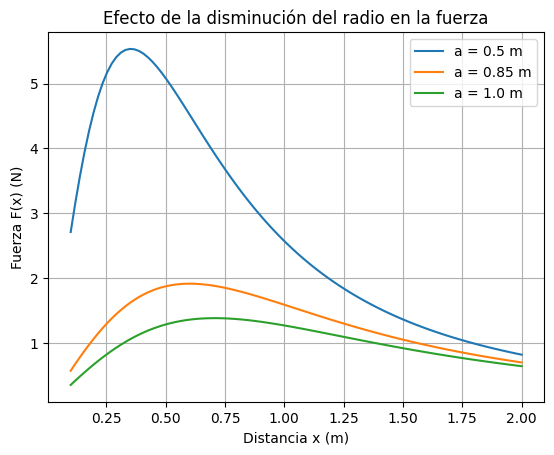

In [8]:
# Graficar la fuerza para diferentes radios a
a_values = [0.5, 0.85, 1.0]
plt.figure()

for a in a_values:
    f_values = fuerza(a, x_values)
    plt.plot(x_values, f_values, label=f'a = {a} m')

plt.xlabel('Distancia x (m)')
plt.ylabel('Fuerza F(x) (N)')
plt.title('Efecto de la disminución del radio en la fuerza')
plt.legend()
plt.grid(True)
plt.show()

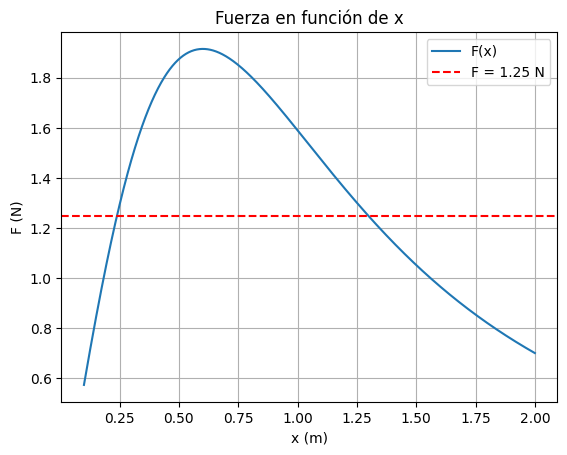

In [9]:
import numpy as np
import matplotlib.pyplot as plt

ε0 = 8.854e-12
q = Q = 2e-5
a = 0.85

def F(x):
    return (1 / (4 * np.pi * ε0)) * (q * Q * x) / (x**2 + a**2)**(1.5)

x_vals = np.linspace(0.1, 2.0, 1000)
y_vals = F(x_vals)

plt.plot(x_vals, y_vals, label='F(x)')
plt.axhline(1.25, color='red', linestyle='--', label='F = 1.25 N')
plt.xlabel('x (m)')
plt.ylabel('F (N)')
plt.title('Fuerza en función de x')
plt.legend()
plt.grid(True)
plt.show()

🔍 Conclusión:

•	El método de Newton-Raphson y el método de bisección son útiles para encontrar el valor de $x$ en el cual la fuerza es 1.25 N.

•	Disminuir el radio $a$ hace que la fuerza aumente en general, ya que la distribución de la carga en el anillo cambia.

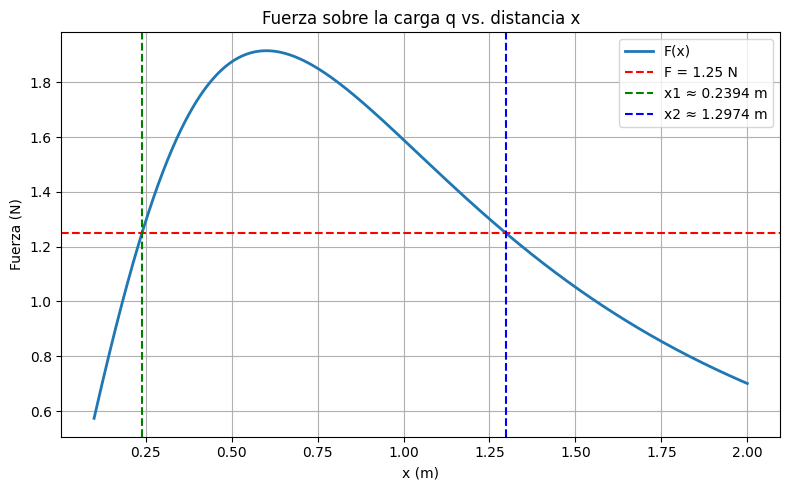

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect

# Constantes
ε0 = 8.854e-12
q = Q = 2e-5
a = 0.85

# Definimos la función F(x)
def F(x):
    return (1 / (4 * np.pi * ε0)) * (q * Q * x) / (x**2 + a**2)**(1.5)

# Función auxiliar: F(x) - 1.25 para encontrar raíces
def F_target(x):
    return F(x) - 1.25

# Encontrar las dos raíces usando bisección
x1 = bisect(F_target, 0.1, 0.5)
x2 = bisect(F_target, 1.0, 2.0)

# Crear los valores de x para graficar
x_vals = np.linspace(0.1, 2.0, 1000)
y_vals = F(x_vals)

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label='F(x)', linewidth=2)
plt.axhline(1.25, color='red', linestyle='--', label='F = 1.25 N')
plt.axvline(x1, color='green', linestyle='--', label=f'x1 ≈ {x1:.4f} m')
plt.axvline(x2, color='blue', linestyle='--', label=f'x2 ≈ {x2:.4f} m')

# Estética
plt.xlabel('x (m)')
plt.ylabel('Fuerza (N)')
plt.title('Fuerza sobre la carga q vs. distancia x')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 3

La velocidad ascendente $v$ de un cohete se puede calcular mediante
$$v = u\ln \frac{m_0}{m_0 - qt} - gt$$

donde $u$ es la velocidad a la que se expulsa el combustible, $m_0$ la masa inicial del cohete en $t = 0$, $q$ la razón de consumo del combustible y $g = 9.81$ m/s$^2$.

* Escriba una función para $v$ con las variables asociadas.
* Sea $m_0 = 1.6\times 10^5$ kg, $u = 1800$ m/s y $q = 2600$ kg/s realice un grafico de $v(t)$ para $0\leq t\leq 100$ s.
* Encuentre el valor de tiempo para el cual $v = 750$ m/s usando el método de Newton-Raphson, Bisección y el de Regula-Falsi
* Varie los valores de $u$ (utilice por lo menos 20) y encuentre los tiempos para los cuales el cohete alcanzará la velocidad de 750 m/s. Qué conclusiones puede sacar?



In [11]:
import numpy as np

def velocidad_cohete(t, u, m0, q, g=9.81):
    if m0 - q * t <= 0:
        return np.nan  # Evitar división por cero o logaritmo de número negativo
    return u * np.log(m0 / (m0 - q * t)) - g * t

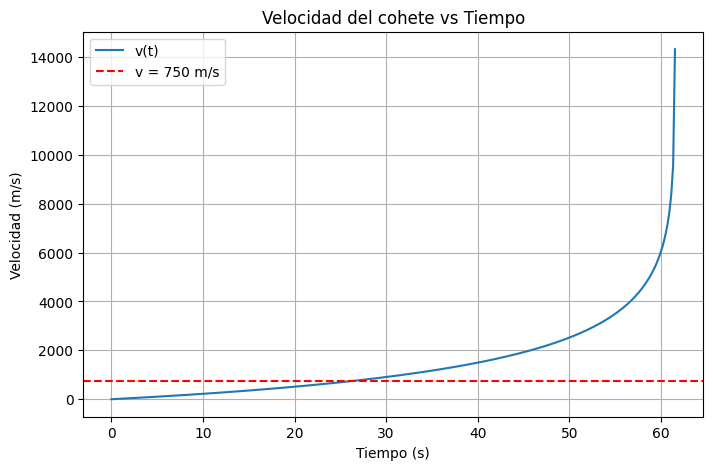

In [12]:
import matplotlib.pyplot as plt

# Parámetros
m0 = 1.6e5
u = 1800
q = 2600

# Dominio temporal
t_vals = np.linspace(0, 100, 500)
v_vals = [velocidad_cohete(t, u, m0, q) for t in t_vals]

# Gráfico
plt.figure(figsize=(8, 5))
plt.plot(t_vals, v_vals, label='v(t)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.title('Velocidad del cohete vs Tiempo')
plt.grid(True)
plt.axhline(750, color='r', linestyle='--', label='v = 750 m/s')
plt.legend()
plt.show()

In [13]:
def f(t, u, m0, q, g=9.81):
    return velocidad_cohete(t, u, m0, q, g) - 750

In [14]:
from scipy.optimize import newton

t_nr = newton(f, x0=10, args=(u, m0, q))
print("Newton-Raphson:", t_nr)

Newton-Raphson: 26.407847955967032


In [15]:
from scipy.optimize import bisect

t_bi = bisect(f, 1, 60, args=(u, m0, q))
print("Bisección:", t_bi)

Bisección: 26.407847955966616


In [16]:
from scipy.optimize import brentq

t_rf = brentq(f, 1, 60, args=(u, m0, q))
print("Regula Falsi (Brentq):", t_rf)

Regula Falsi (Brentq): 26.40784795596704


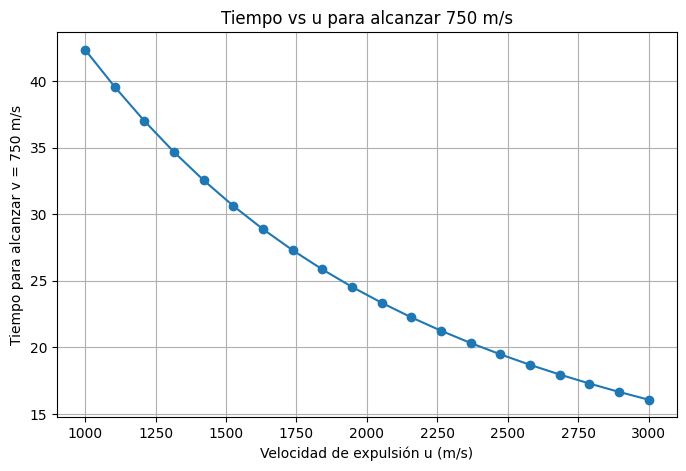

In [17]:
u_vals = np.linspace(1000, 3000, 20)
t_750 = []

for u_i in u_vals:
    try:
        t_i = brentq(f, 1, 60, args=(u_i, m0, q))
    except ValueError:
        t_i = np.nan
    t_750.append(t_i)

# Gráfico
plt.figure(figsize=(8, 5))
plt.plot(u_vals, t_750, marker='o')
plt.xlabel('Velocidad de expulsión u (m/s)')
plt.ylabel('Tiempo para alcanzar v = 750 m/s')
plt.title('Tiempo vs u para alcanzar 750 m/s')
plt.grid(True)
plt.show()

•	A medida que aumenta la velocidad de expulsión $u$, el cohete alcanza los $750 m/s$ más rápido.

•	Existe un mínimo valor de $u$ debajo del cual no se puede alcanzar esa velocidad debido a que la fuerza de gravedad supera el empuje.

•	Para $u < 1736.84 \text{m/s}$, la velocidad de $750 m/s$ no se alcanza: el impulso no es suficiente para vencer la gravedad y alcanzar esa velocidad.

•	A mayor $u$, el tiempo $t$ necesario para alcanzar $750 m/s$ disminuye notablemente.

•	Esta relación no es lineal debido a la presencia del logaritmo y la pérdida de masa por consumo de combustible.